**U.S. Airbnb Open Data**

In [1]:
import pandas as pd

In [2]:
AirbnbData = pd.read_csv('AB_US_2023.csv')

C:\Users\musta\AppData\Local\Temp\ipykernel_4868\2652525239.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  AirbnbData = pd.read_csv('AB_US_2023.csv')


In [3]:
AirbnbData.all()

id                                 True
name                               True
host_id                            True
host_name                          True
neighbourhood_group                True
neighbourhood                      True
latitude                           True
longitude                          True
room_type                          True
price                             False
minimum_nights                     True
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count     True
availability_365                  False
number_of_reviews_ltm             False
city                               True
dtype: bool

In [4]:
AirbnbData.head(5)

id                                               name  host_id  \
0   958              Bright, Modern Garden Unit - 1BR/1BTH     1169   
1  5858                                 Creative Sanctuary     8904   
2  8142  Friendly Room Apt. Style -UCSF/USF - San Franc...    21994   
3  8339                    Historic Alamo Square Victorian    24215   
4  8739                Mission Sunshine, with Private Bath     7149   

          host_name neighbourhood_group     neighbourhood  latitude  \
0             Holly                 NaN  Western Addition  37.77028   
1  Philip And Tania                 NaN    Bernal Heights  37.74474   
2             Aaron                 NaN    Haight Ashbury  37.76555   
3              Rosy                 NaN  Western Addition  37.77564   
4      Ivan & Wendy                 NaN           Mission  37.76030   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -122.43317  Entire home/apt    202               2                383   
1 -122.42089  Entire home/apt    235              30                111   
2 -122.45213     Private room     56              32                  9   
3 -122.43642  Entire home/apt    575               9                 28   
4 -122.42197     Private room    110               1                770   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2023-02-19               2.31                               1   
1  2017-08-06               0.66                               1   
2  2022-10-27               0.09                              13   
3  2019-06-28               0.17                               2   
4  2023-02-25               4.65                               2   

   availability_365  number_of_reviews_ltm           city  
0               128                     59  San Francisco  
1               365                      0  San Francisco  
2               365                      1  San Francisco  
3               365                      0  San Francisco  
4               159                     34  San Francisco

In [5]:
#find missing values

missing_values = AirbnbData.isnull().sum()
print(missing_values)

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64


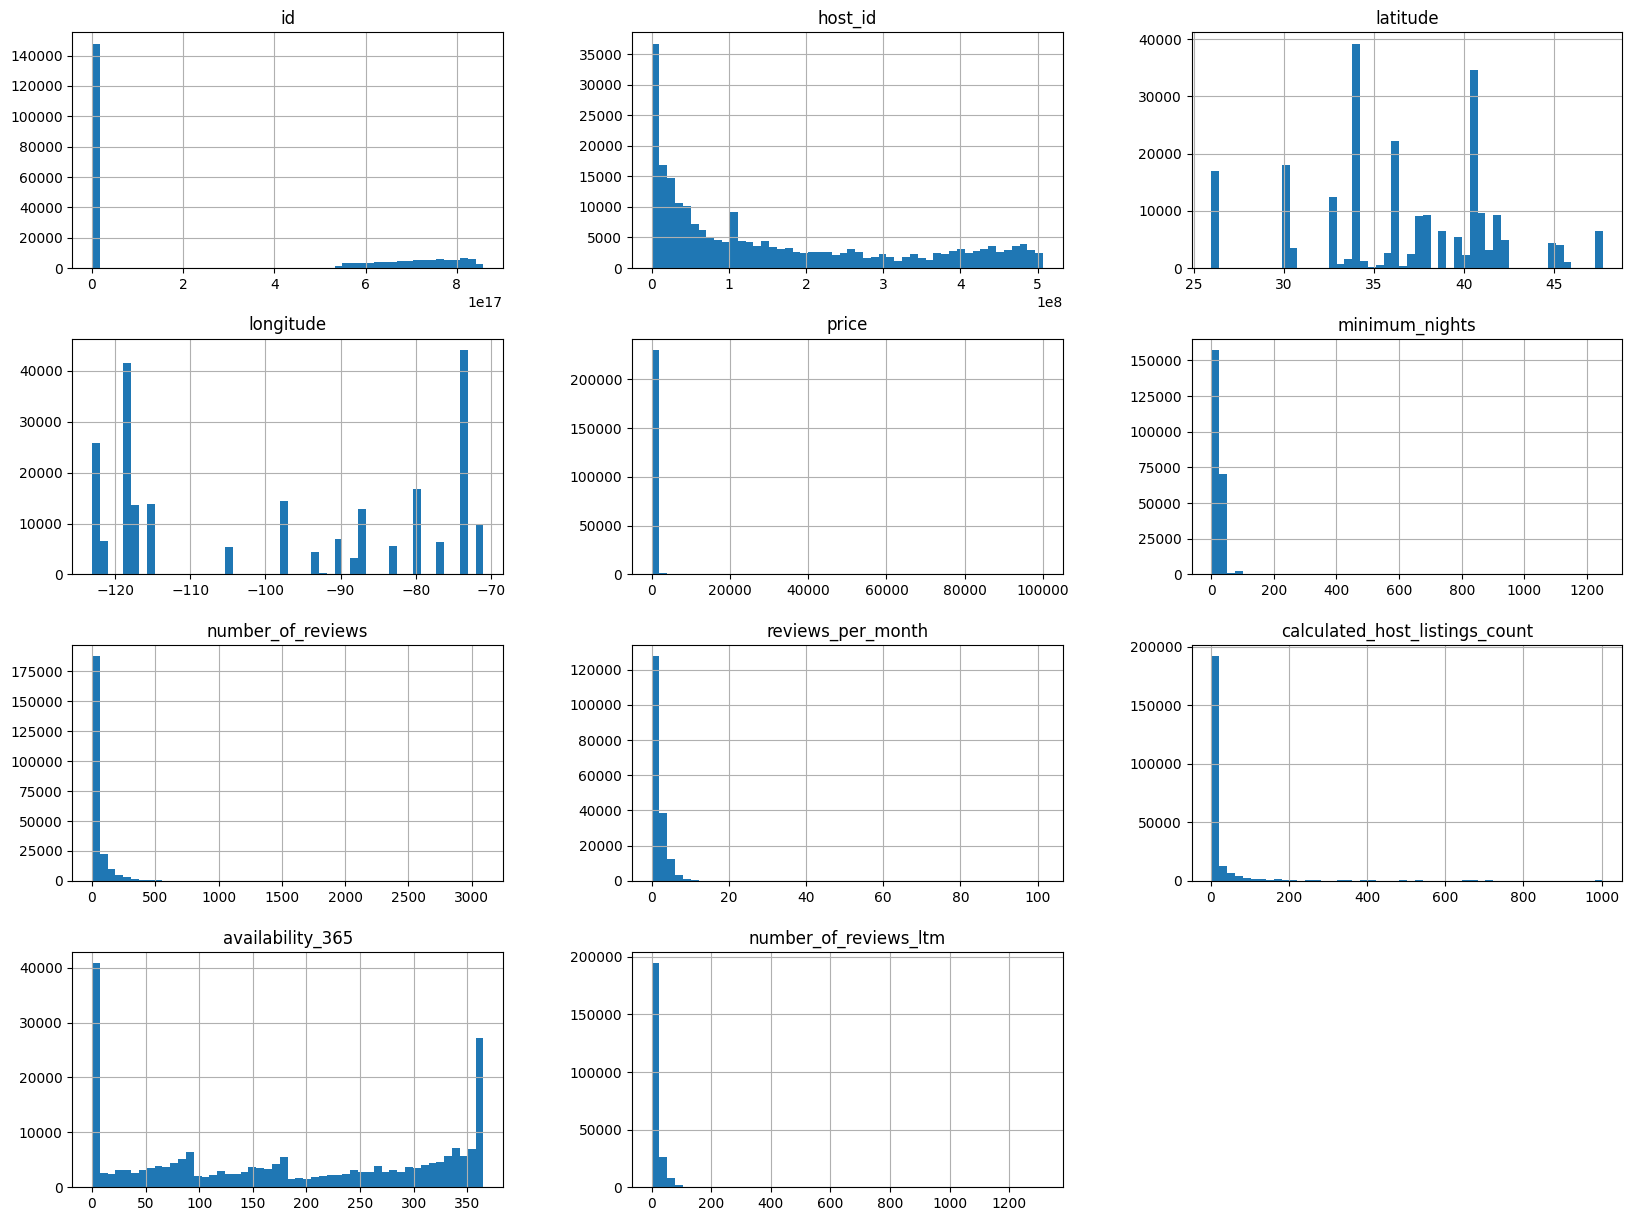

In [6]:
# Summary statistics for numerical columns
summary_statistics = AirbnbData.describe()

# Distributions of numerical features
import matplotlib.pyplot as plt
AirbnbData.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Select the numeric columns for checking for correlation 
numeric_cols = AirbnbData.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

# look at how everything correlates to price
price_correlations = correlation_matrix["price"].sort_values(ascending=False)
print(price_correlations)

print("--------------------")

# look at how everything correlates to no of reviews
price_correlations = correlation_matrix["number_of_reviews"].sort_values(ascending=False)
print(price_correlations)

price                             1.000000
host_id                           0.020140
calculated_host_listings_count    0.018823
id                                0.017181
availability_365                  0.015663
minimum_nights                   -0.022933
longitude                        -0.023272
reviews_per_month                -0.025588
number_of_reviews_ltm            -0.035012
number_of_reviews                -0.035233
latitude                         -0.041702
Name: price, dtype: float64
--------------------
number_of_reviews                 1.000000
number_of_reviews_ltm             0.676836
reviews_per_month                 0.602442
latitude                          0.035587
availability_365                 -0.027564
price                            -0.035233
longitude                        -0.051300
calculated_host_listings_count   -0.107552
minimum_nights                   -0.126818
host_id                          -0.184252
id                               -0.311539
Name:

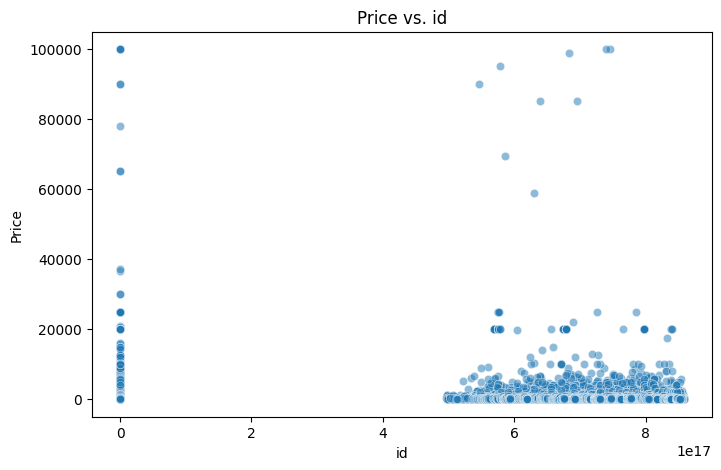

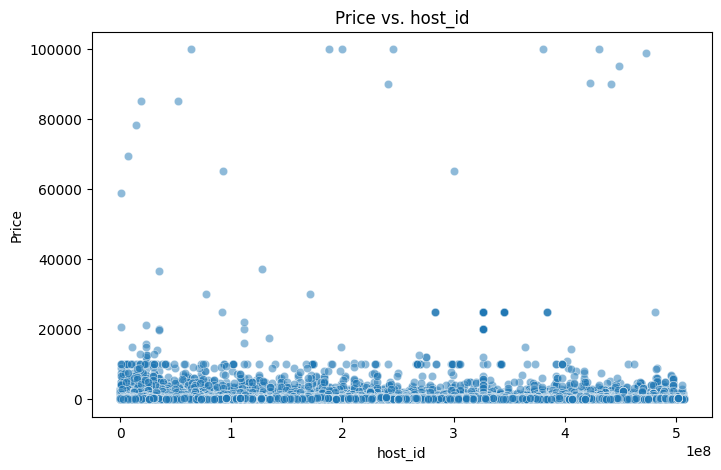

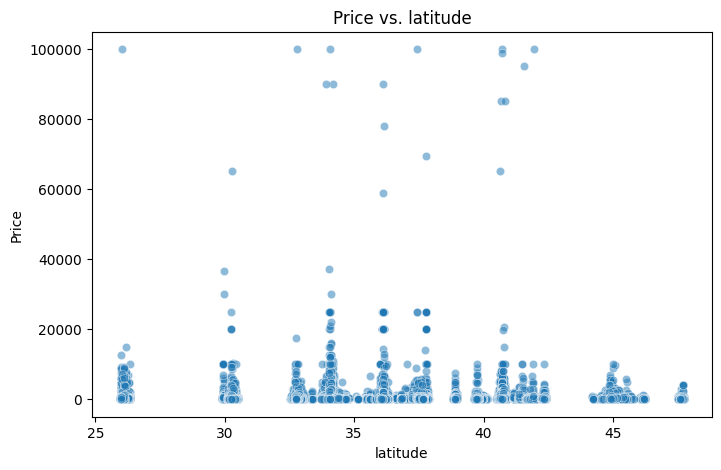

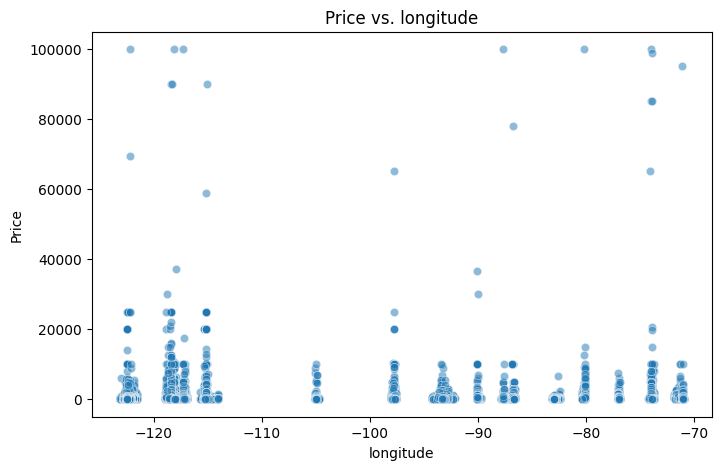

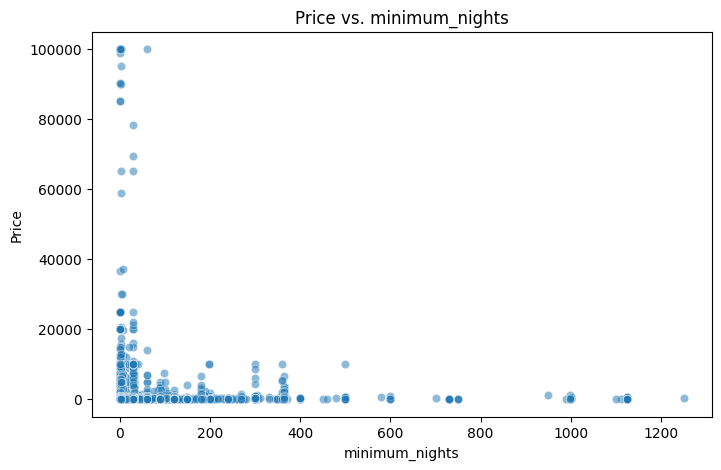

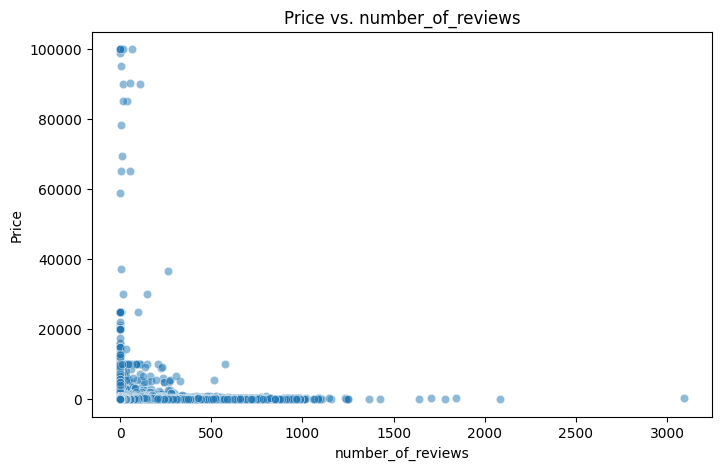

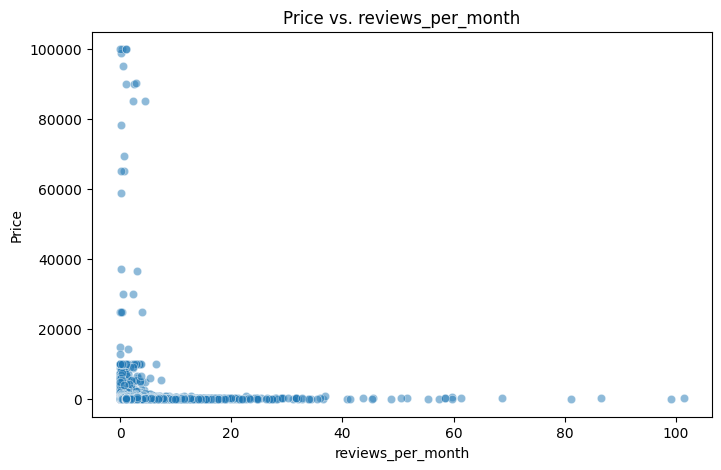

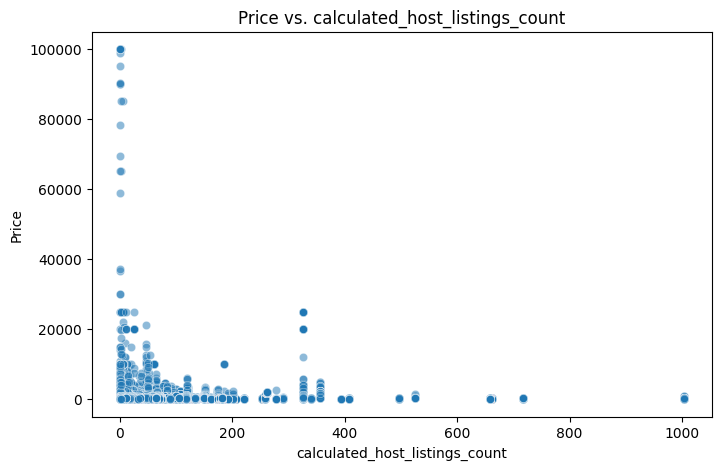

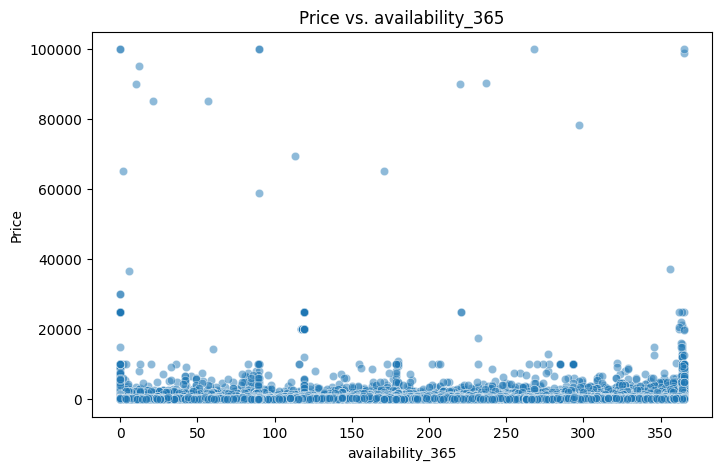

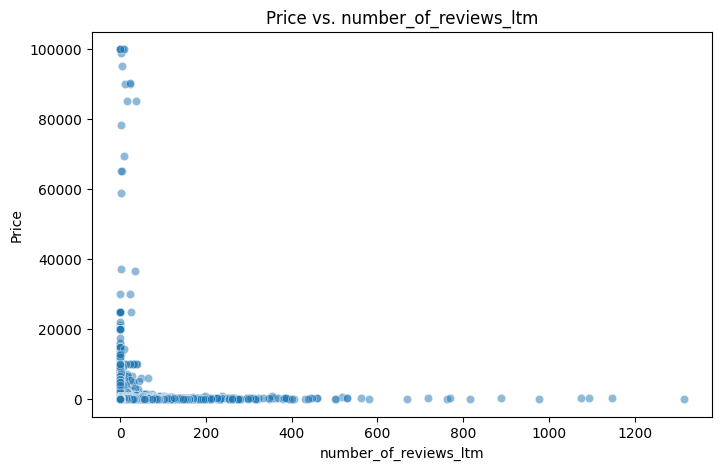

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns (excluding 'price' to avoid plotting it against itself)
numeric_cols = AirbnbData.select_dtypes(include=['int64', 'float64']).columns.drop('price')

# Plotting
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=AirbnbData, x=col, y='price', alpha=0.5)
    plt.title(f'Price vs. {col}')
    plt.ylabel('Price')
    plt.xlabel(col)
    plt.show()


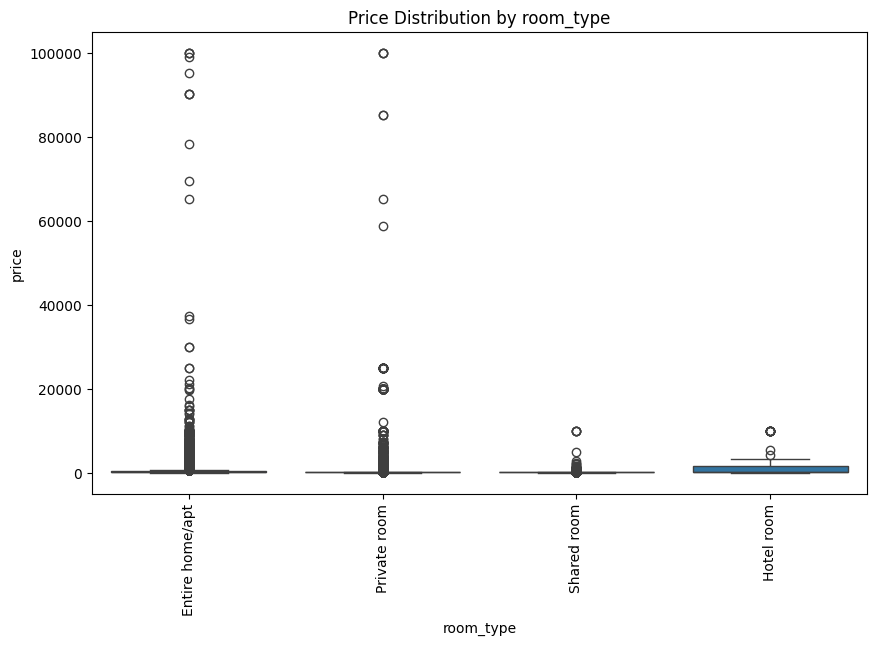

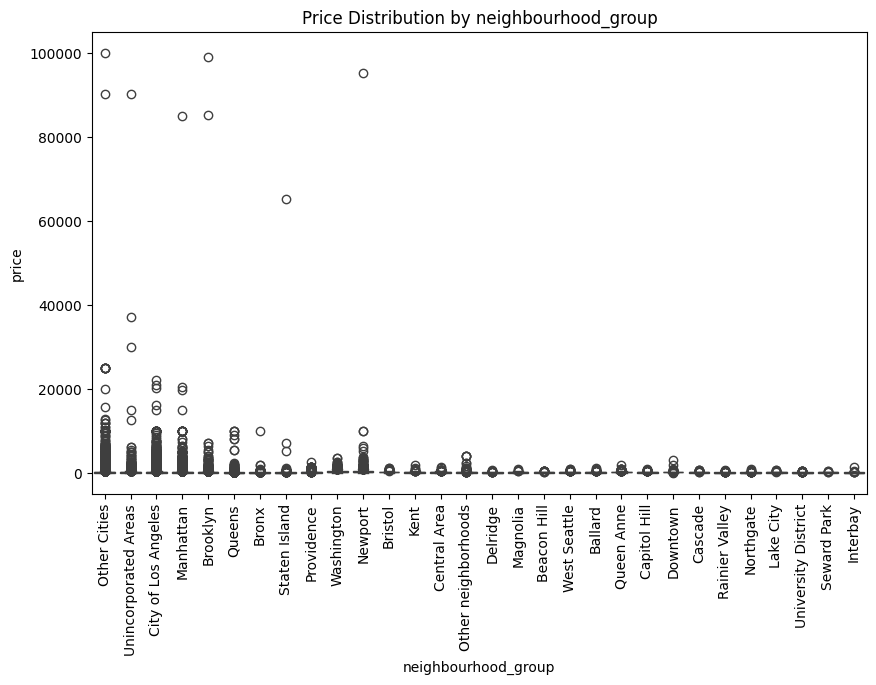

In [17]:
# 'room_type' and 'neighbourhood_group' are categorical
categorical_cols = ['room_type', 'neighbourhood_group']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=AirbnbData, x=col, y='price')
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=90)  # Rotate labels to avoid overlap
    plt.show()


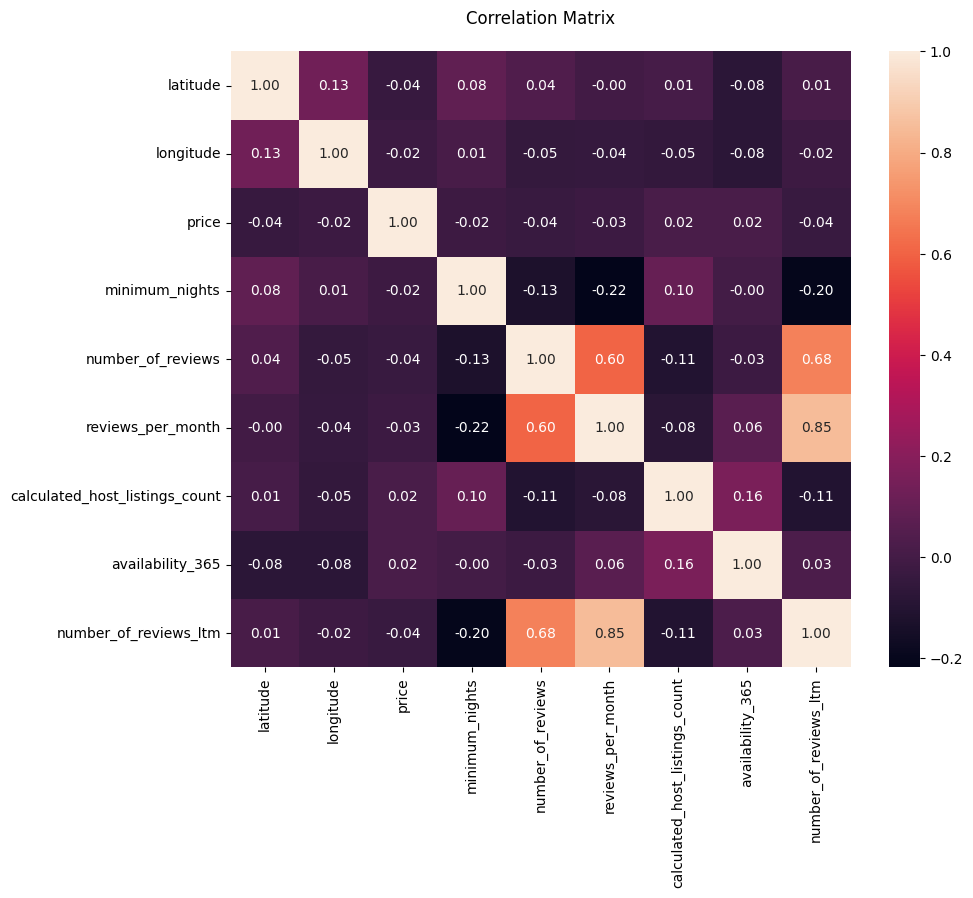

In [29]:
# Select only numeric columns and exclude 'id' and 'host_id'
numeric_cols = AirbnbData.select_dtypes(include=['int64', 'float64']).drop(columns=['id', 'host_id'])

# Compute the correlation matrix for the filtered DataFrame
correlation_matrix = numeric_cols.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

# Add a title to the heatmap
plt.title('Correlation Matrix', pad=20)

plt.show()

In [22]:
#removing outliers to make data cleaner

#calculate Interquartile Range
numeric_data = AirbnbData.select_dtypes(include=['int64', 'float64'])
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

#calc. the outliers/create mask
outlier_mask = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)

#then remove
AirbnbData_cleaned = AirbnbData[~outlier_mask]


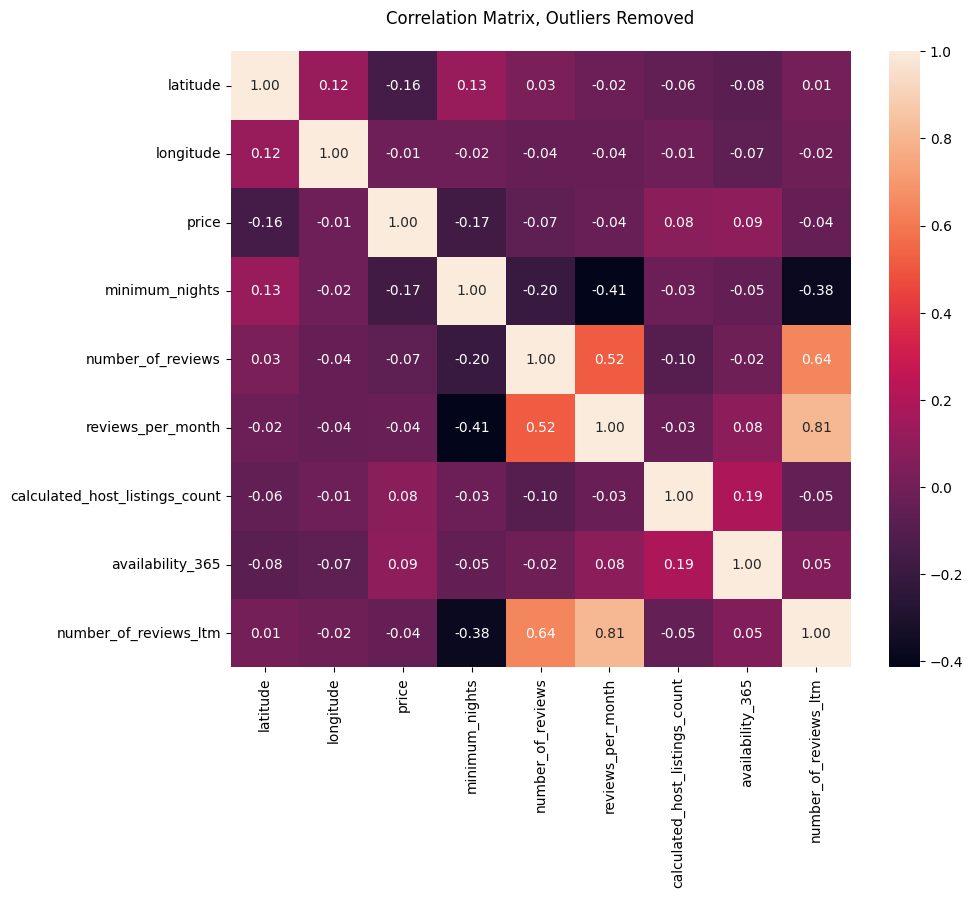

In [31]:
# Select only numeric columns and exclude 'id' and 'host_id'
numeric_cols = AirbnbData_cleaned.select_dtypes(include=['int64', 'float64']).drop(columns=['id', 'host_id'])

# Compute the correlation matrix for the filtered DataFrame
correlation_matrix = numeric_cols.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

# Add a title to the heatmap
plt.title('Correlation Matrix, Outliers Removed', pad=20)

plt.show()

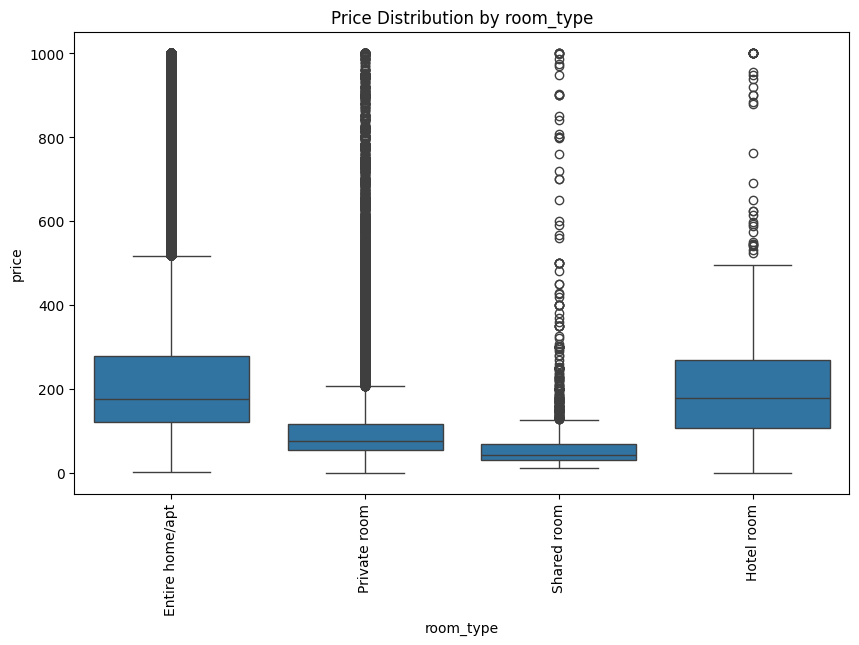

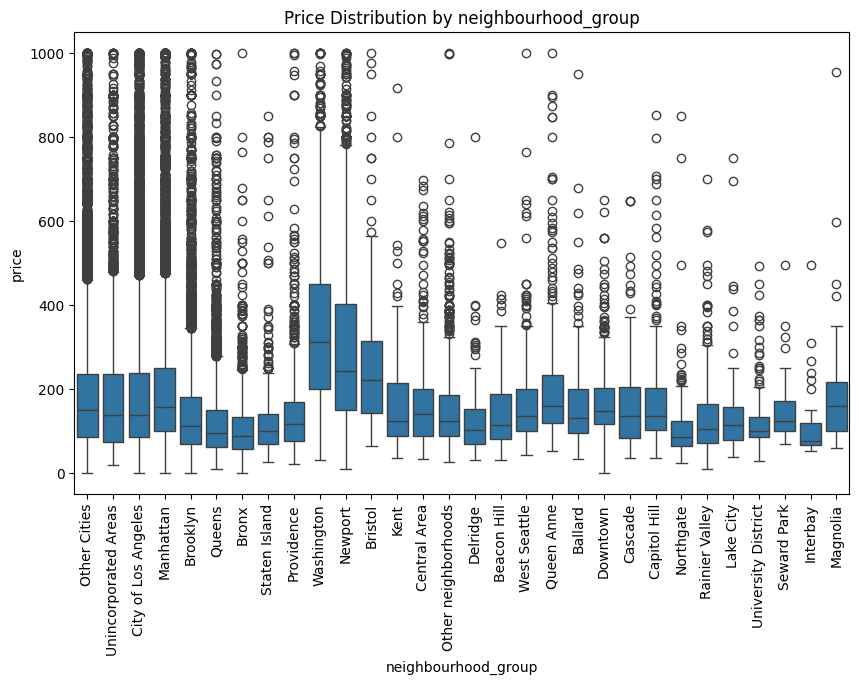

In [23]:
# 'room_type' and 'neighbourhood_group' are categorical
categorical_cols = ['room_type', 'neighbourhood_group']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=AirbnbData_cleaned, x=col, y='price')
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=90)  # Rotate labels to avoid overlap
    plt.show()

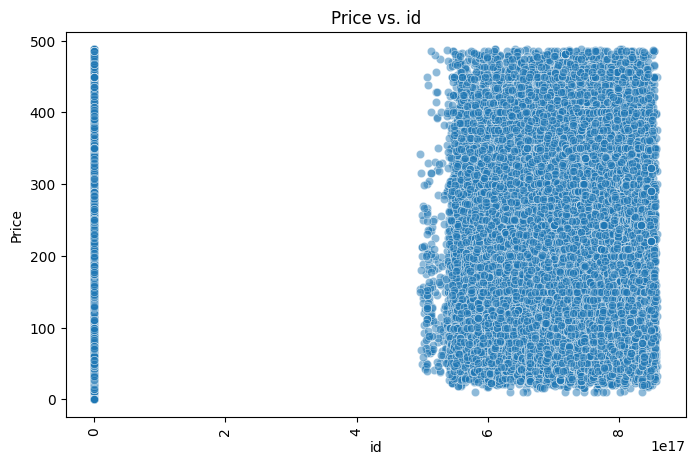

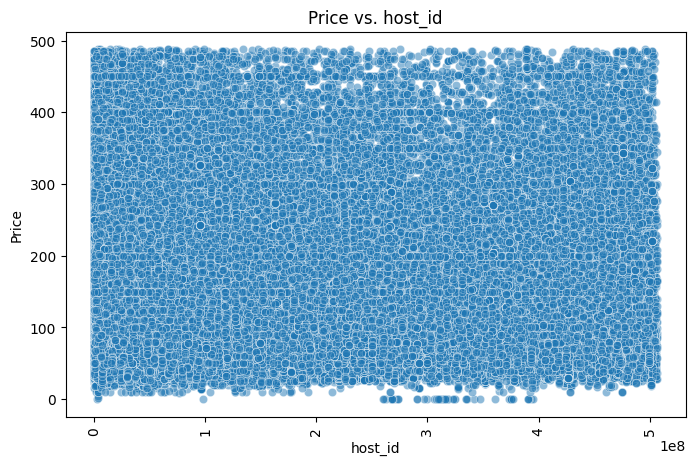

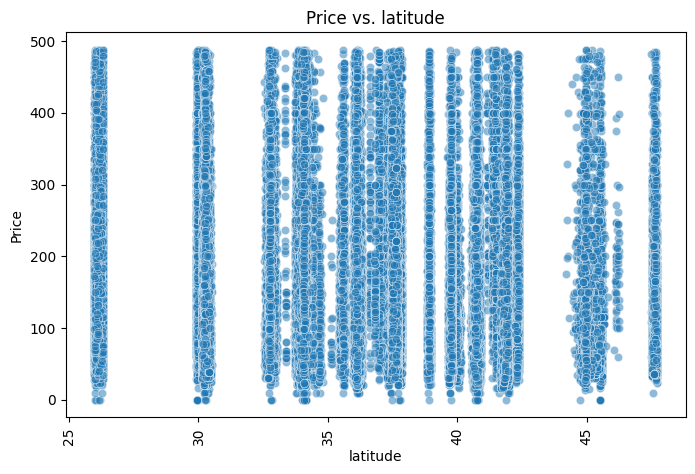

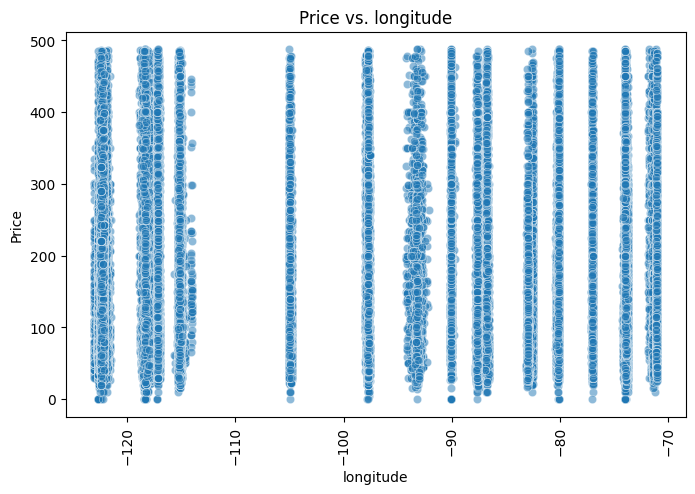

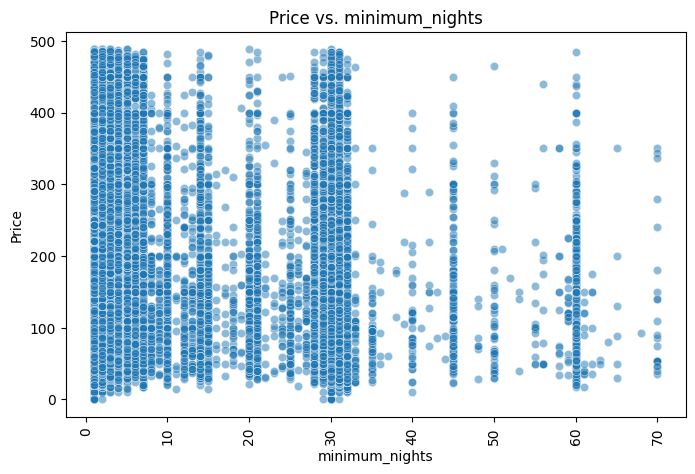

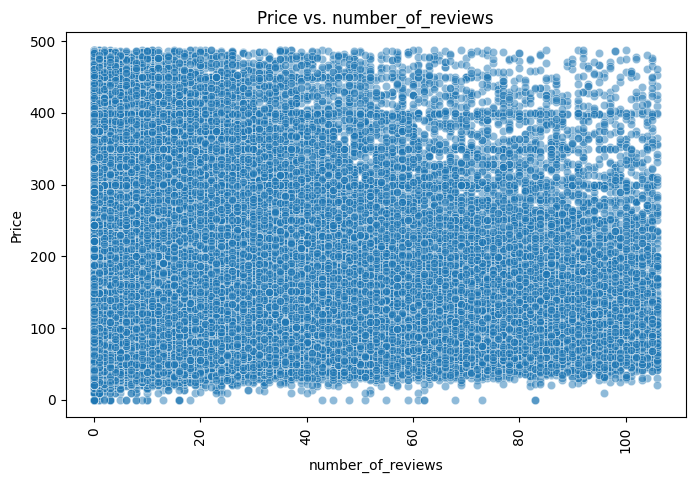

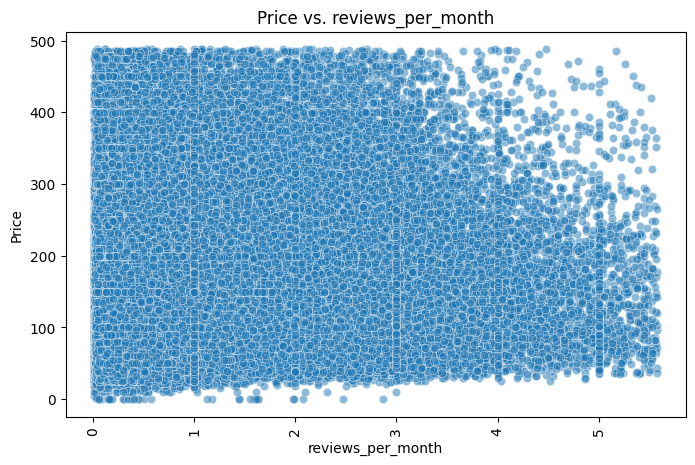

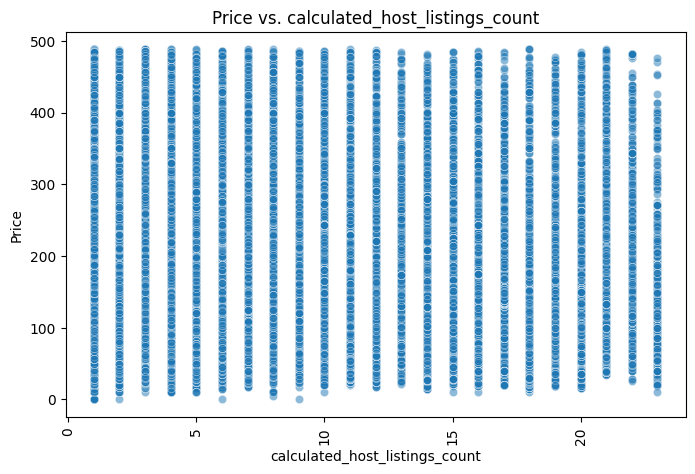

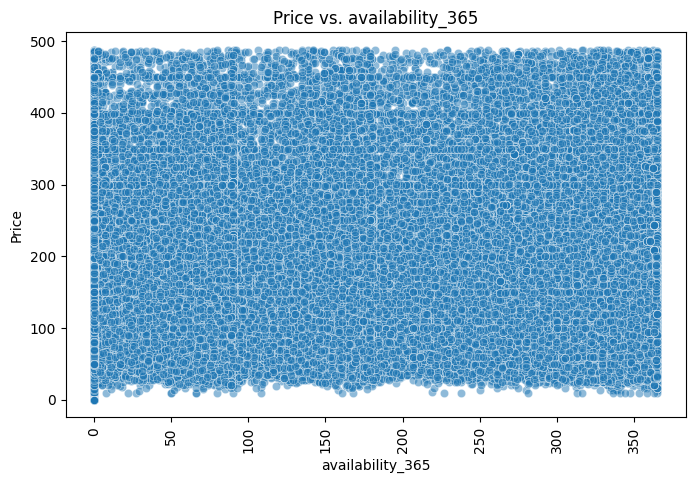

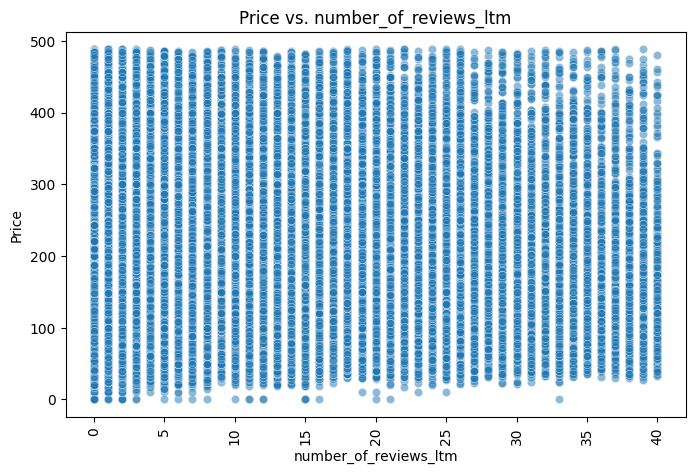

In [13]:
numeric_cols = AirbnbData_cleaned.select_dtypes(include=['int64', 'float64']).columns.drop('price')

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=AirbnbData_cleaned, x=col, y='price', alpha=0.5)
    plt.title(f'Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(rotation=90)  # Rotate a cow in your head
    plt.show()

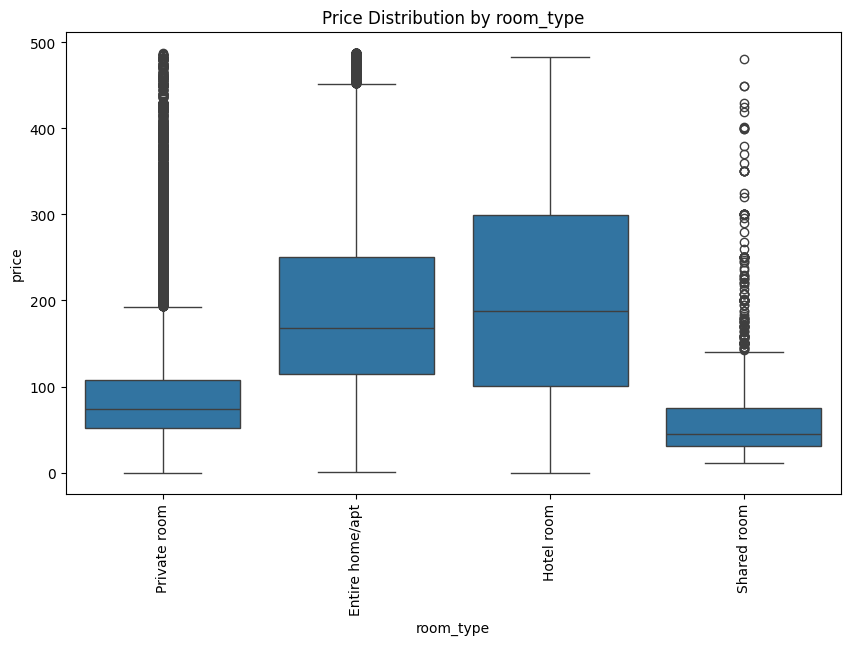

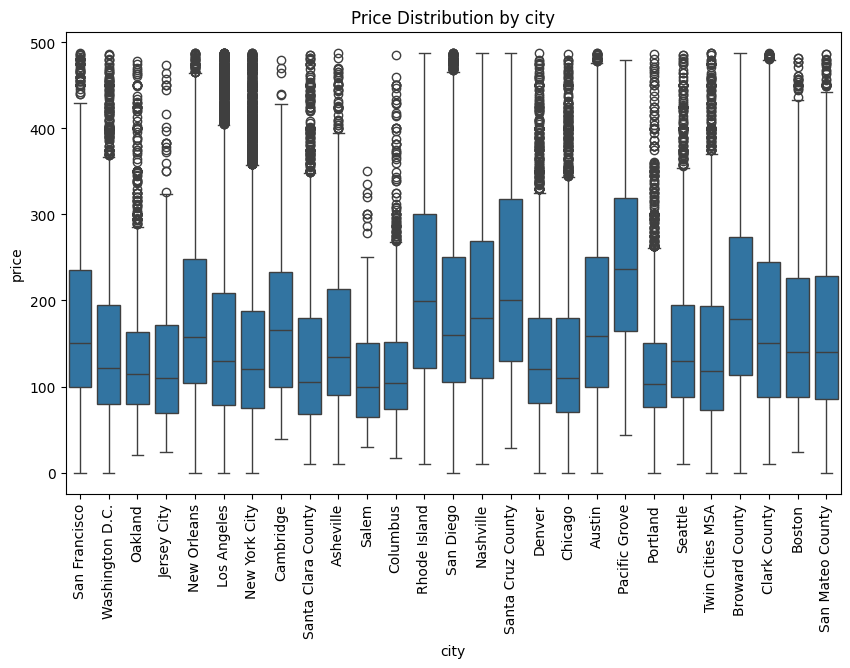

In [14]:
categorical_cols = ['room_type', 'city']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=AirbnbData_cleaned, x=col, y='price')
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=90)
    plt.show()

# DIDNT DO ANY GOOD TO REMOVE OUTLIERS

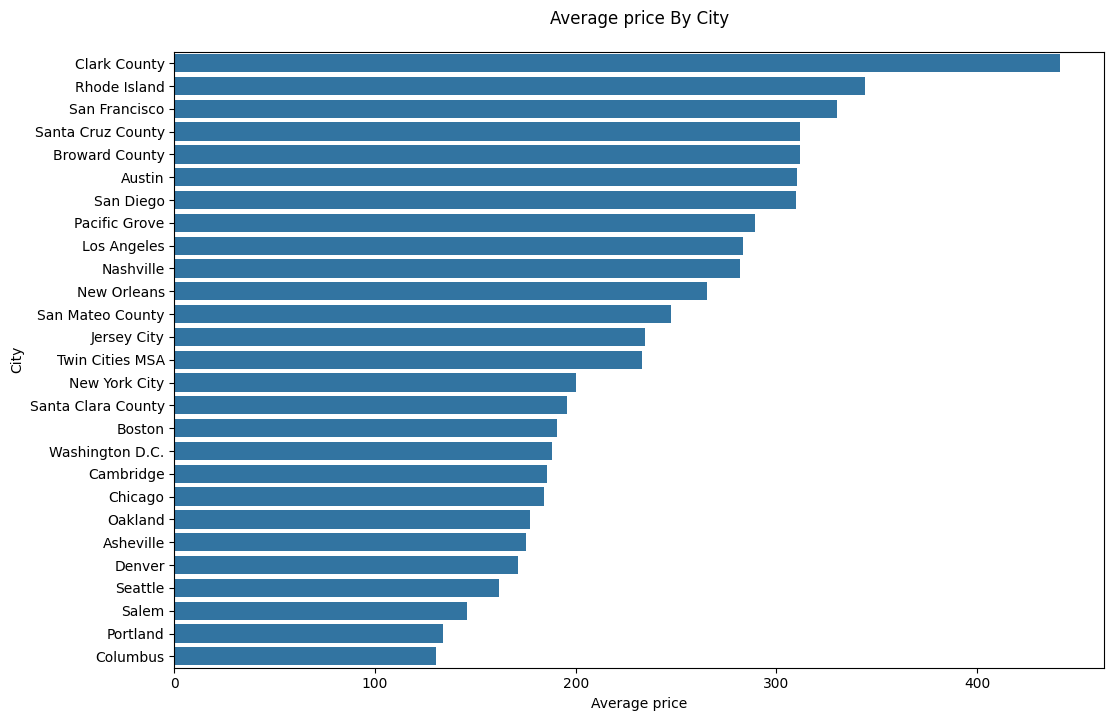

In [38]:
average_price_by_city = AirbnbData.groupby('city')['price'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_by_city.values, y=average_price_by_city.index)
plt.title('Average price By City', pad=20)
plt.xlabel('Average price')
plt.ylabel('City')

plt.show()